# Installment Payments Dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")
import pylab
pylab.rcParams['figure.figsize'] = (15, 10)

import seaborn as sns
import time
from scipy import stats

In [4]:
app_train = pd.read_csv('app_train_red.csv', index_col = 0)
prev_apps = pd.read_csv("previous_application.csv")
pmts = pd.read_csv("installments_payments.csv")

In [ ]:
prev_apps.sort_values(["SK_ID_PREV"]).head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
38906,1000001,158271,Consumer loans,6404.310,58905.000,65124.0,0.000,58905.000,THURSDAY,8,...,Furniture,12.0,middle,POS industry with interest,365243.0,-268.0,62.0,-238.0,-233.0,0.0
73676,1000002,101962,Consumer loans,6264.000,39145.500,35230.5,3915.000,39145.500,SUNDAY,8,...,Consumer electronics,6.0,low_normal,POS household with interest,365243.0,-1600.0,-1450.0,-1510.0,-1501.0,0.0
1517084,1000003,252457,Consumer loans,4951.350,47056.275,52641.0,4.275,47056.275,SUNDAY,13,...,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-94.0,236.0,365243.0,365243.0,1.0
1406334,1000004,260094,Consumer loans,3391.110,35144.370,30586.5,7032.870,35144.370,THURSDAY,9,...,Consumer electronics,10.0,low_normal,POS household without interest,365243.0,-862.0,-592.0,-682.0,-672.0,0.0
523289,1000005,176456,Consumer loans,14713.605,123486.075,120307.5,12349.575,123486.075,THURSDAY,13,...,Construction,10.0,middle,POS industry with interest,365243.0,-1688.0,-1418.0,-1418.0,-1415.0,0.0
1476878,1000006,427505,Consumer loans,10572.345,51417.000,51417.0,0.000,51417.000,WEDNESDAY,13,...,Connectivity,6.0,high,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
1102061,1000007,256657,Consumer loans,11246.805,78570.000,62856.0,15714.000,78570.000,SUNDAY,13,...,Consumer electronics,6.0,low_normal,POS household with interest,365243.0,-123.0,27.0,365243.0,365243.0,0.0
368627,1000008,152059,Consumer loans,26331.660,249255.000,224325.0,24930.000,249255.000,MONDAY,14,...,Consumer electronics,10.0,middle,POS household with interest,365243.0,-1282.0,-1012.0,-1042.0,-1034.0,0.0
10842,1000009,343078,Consumer loans,9302.850,42705.000,45243.0,0.000,42705.000,SATURDAY,11,...,Consumer electronics,6.0,high,POS household with interest,365243.0,-457.0,-307.0,-307.0,-305.0,0.0
1636159,1000010,377567,Cash loans,74682.000,900000.000,900000.0,NaN,900000.000,THURSDAY,17,...,Consumer electronics,18.0,high,Cash X-Sell: high,365243.0,-558.0,-48.0,-258.0,-256.0,0.0


In [ ]:
pmts.sort_values(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"]).head(20)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
512588,1000001,158271,1.0,1,-268.0,-294.0,6404.310,6404.310
2159480,1000001,158271,2.0,2,-238.0,-244.0,62039.115,62039.115
1214732,1000002,101962,1.0,1,-1600.0,-1611.0,6264.000,6264.000
1631862,1000002,101962,1.0,2,-1570.0,-1575.0,6264.000,6264.000
3411021,1000002,101962,1.0,3,-1540.0,-1559.0,6264.000,6264.000
1006868,1000002,101962,2.0,4,-1510.0,-1554.0,18443.565,18443.565
6145031,1000003,252457,1.0,1,-94.0,-108.0,4951.350,4951.350
7054246,1000003,252457,1.0,2,-64.0,-81.0,4951.350,4951.350
4279518,1000003,252457,1.0,3,-34.0,-49.0,4951.350,4951.350
7126740,1000004,260094,1.0,1,-862.0,-881.0,3391.110,3391.110


In [ ]:
pmts_totals = pmts.groupby("SK_ID_PREV").AMT_INSTALMENT.agg(total = "sum").reset_index()
pmt_diff = pd.merge(prev_apps, pmts_totals, on = "SK_ID_PREV")[["SK_ID_PREV", "AMT_CREDIT", "total"]]

In [ ]:
pmt_diff["balance_left"] = pmt_diff.total - pmt_diff.AMT_CREDIT

In [ ]:
pmt_diff.head()

,SK_ID_PREV,AMT_CREDIT,total,balance_left
0,2030495,17145.0,17284.275,139.275
1,2802425,679671.0,125943.075,-553727.925
2,2523466,136444.5,135546.615,-897.885
3,2819243,470790.0,563133.375,92343.375
4,1383531,340573.5,419332.905,78759.405


In [ ]:
sns.histplot(pmt_diff.difference, bins = 100)

AttributeError: 'DataFrame' object has no attribute 'difference'

In [ ]:
pmts.SK_ID_PREV.isin(prev_apps.SK_ID_PREV).sum() / len(pmts)

0.9080640107557285

In [ ]:
pmts.SK_ID_CURR.isin(prev_apps.SK_ID_CURR).sum() / len(pmts)

0.9937777651684063

In [ ]:
pmts[ ~pmts.SK_ID_PREV.isin(prev_apps.SK_ID_PREV) ].SK_ID_CURR.value_counts()

217360    279
212238    248
343828    224
335207    223
263929    222
         ... 
426850      1
213640      1
305578      1
218072      1
184663      1
Name: SK_ID_CURR, Length: 35227, dtype: int64

In [ ]:
# sns.scatterplot(install_pmts.AMT_INSTALMENT, install_pmts.AMT_PAYMENT)
# sns.lineplot([0, max(install_pmts.AMT_INSTALMENT)], [0, max(install_pmts.AMT_PAYMENT)])


In [ ]:
print(len(pmts[pmts.AMT_PAYMENT >= pmts.AMT_INSTALMENT]) / len(pmts) )
print(len(pmts[pmts.AMT_PAYMENT < pmts.AMT_INSTALMENT]) / len(pmts) )

NameError: name 'install_pmts' is not defined

In [ ]:
sns.histplot(pmts.AMT_PAYMENT)

In [ ]:
# sns.histplot(install_pmts.AMT_PAYMENT - install_pmts.AMT_INSTALMENT, bins = 100)

In [ ]:
# sns.scatterplot(install_pmts.AMT_INSTALMENT, install_pmts.AMT_PAYMENT - install_pmts.AMT_INSTALMENT)

In [ ]:
install_pmts[install_pmts.AMT_PAYMENT == 0].SK_ID_CURR.value_counts()

In [ ]:
missed_pmts = pd.DataFrame(install_pmts[install_pmts.AMT_PAYMENT == 0].SK_ID_CURR.value_counts()).reset_index()
missed_pmts.columns = ["SK_ID_CURR", "Pmts_Missed"]
missed_pmts

In [ ]:
missed_pmts[missed_pmts.Pmts_Missed > 1]

In [ ]:
under_paid = pd.DataFrame(install_pmts[install_pmts.AMT_PAYMENT < install_pmts.AMT_INSTALMENT].SK_ID_CURR.value_counts()).reset_index()
under_paid

In [ ]:
pmts[pmts.SK_ID_PREV == 2802425]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1147425,2802425,108129,1.0,2,-104.0,-111.0,25188.615,25188.615
1992210,2802425,108129,1.0,5,-14.0,-24.0,25188.615,25188.615
2103478,2802425,108129,1.0,1,-134.0,-144.0,25188.615,25188.615
3310027,2802425,108129,1.0,4,-44.0,-55.0,25188.615,25188.615
3735308,2802425,108129,1.0,3,-74.0,-82.0,25188.615,25188.615


In [ ]:
prev_apps[prev_apps.SK_ID_PREV == 2802425]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [ ]:
app_train[app_train.SK_ID_CURR == 108129]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
6979,108129,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
prev_apps[(prev_apps.CNT_PAYMENT == 0) & (prev_apps.NAME_CONTRACT_STATUS == "Approved") ]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
17,1285768,142748,Revolving loans,9000.0,180000.0,180000.0,NaN,180000.0,FRIDAY,13,...,XNA,0.0,XNA,Card X-Sell,-277.0,-257.0,365243.0,365243.0,365243.0,0.0
34,1629736,255331,Revolving loans,10125.0,202500.0,202500.0,NaN,202500.0,SATURDAY,14,...,XNA,0.0,XNA,Card X-Sell,-265.0,-234.0,365243.0,365243.0,365243.0,0.0
49,1371540,200721,Revolving loans,11250.0,225000.0,225000.0,NaN,225000.0,FRIDAY,15,...,XNA,0.0,XNA,Card Street,365243.0,365243.0,365243.0,365243.0,-171.0,0.0
82,2709276,342991,Revolving loans,45000.0,900000.0,900000.0,NaN,900000.0,TUESDAY,13,...,XNA,0.0,XNA,Card X-Sell,-479.0,-435.0,365243.0,365243.0,365243.0,0.0
93,2522811,120854,Revolving loans,33750.0,0.0,675000.0,NaN,NaN,THURSDAY,18,...,XNA,0.0,XNA,Card X-Sell,-332.0,-297.0,365243.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669796,1161466,134972,Revolving loans,4500.0,90000.0,90000.0,NaN,90000.0,TUESDAY,12,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,-195.0,0.0
1669830,1292478,319374,Revolving loans,45000.0,0.0,900000.0,NaN,NaN,TUESDAY,16,...,XNA,0.0,XNA,Card X-Sell,-453.0,-409.0,365243.0,365243.0,365243.0,0.0
1669833,1544069,454213,Revolving loans,9000.0,180000.0,180000.0,NaN,180000.0,WEDNESDAY,9,...,XNA,0.0,XNA,Card X-Sell,-596.0,-557.0,365243.0,365243.0,365243.0,0.0
1669960,1731392,180860,Revolving loans,11250.0,0.0,225000.0,NaN,NaN,TUESDAY,17,...,XNA,0.0,XNA,Card X-Sell,-1083.0,-1055.0,365243.0,-354.0,365243.0,0.0


In [ ]:
pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER").AMT_INSTALMENT.mean()

29491.003255813957

In [ ]:
ID = 2709276
print("The loan given was for %f and the borrower ultimately paid out %f so far on the loan, paying an extra %f. \n The payments were supposed to be %f each while the average payemnt made so far is %f."
    %(prev_apps[prev_apps.SK_ID_PREV == ID].AMT_CREDIT, pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER").AMT_INSTALMENT.sum(), 
        pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER").AMT_INSTALMENT.sum() - prev_apps[prev_apps.SK_ID_PREV == ID].AMT_CREDIT,
        prev_apps[prev_apps.SK_ID_PREV == ID].AMT_ANNUITY, pmts[pmts.SK_ID_PREV == ID].AMT_INSTALMENT.mean())
    )

pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER")

The loan given was for 900000.000000 and the borrower ultimately paid out 1268113.140000 so far on the loan, paying an extra 368113.140000. 
 The payments were supposed to be 45000.000000 each while the average payemnt made so far is 29491.003256.


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
8569805,2709276,342991,0.0,1,-435.0,-445.0,2250.000,2250.000
9914087,2709276,342991,0.0,2,-445.0,-445.0,14064.570,14064.570
10007697,2709276,342991,0.0,3,-432.0,-432.0,465.750,465.750
9311899,2709276,342991,0.0,4,-404.0,-421.0,10667.115,10667.115
8670446,2709276,342991,0.0,5,-421.0,-421.0,2832.885,2832.885
9654501,2709276,342991,0.0,6,-398.0,-398.0,31500.000,31500.000
8201029,2709276,342991,0.0,7,-376.0,-385.0,13094.505,13094.505
8936323,2709276,342991,0.0,8,-385.0,-385.0,405.495,405.495
10543512,2709276,342991,0.0,9,-345.0,-357.0,15064.020,15064.020
10052261,2709276,342991,0.0,10,-357.0,-357.0,685.980,685.980


## Why do some people not have a term length for their previous loan?

<AxesSubplot:xlabel='CNT_PAYMENT', ylabel='Count'>

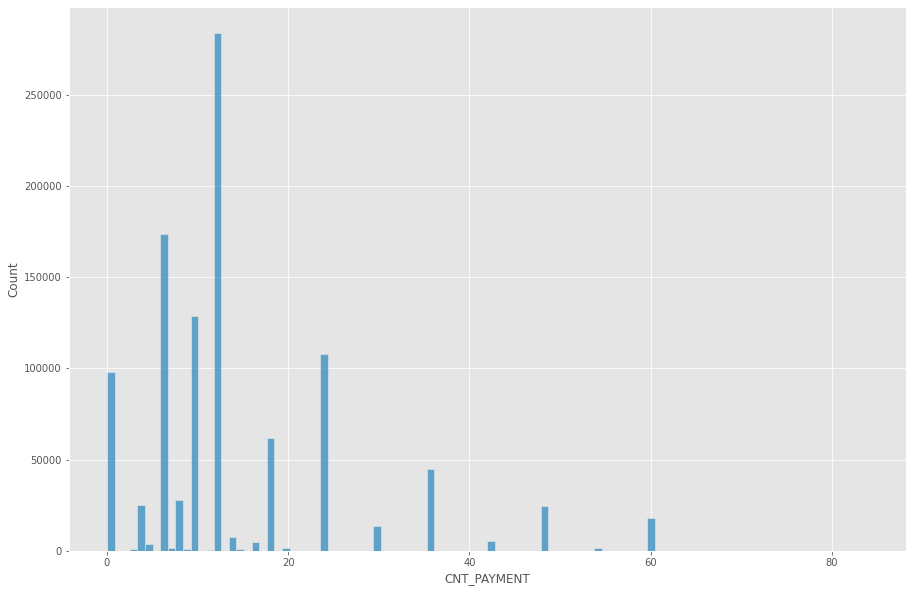

In [ ]:
sns.histplot(prev_apps.CNT_PAYMENT[prev_apps.NAME_CONTRACT_STATUS == "Approved"], bins = 100, stat = "probability")

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='Count'>

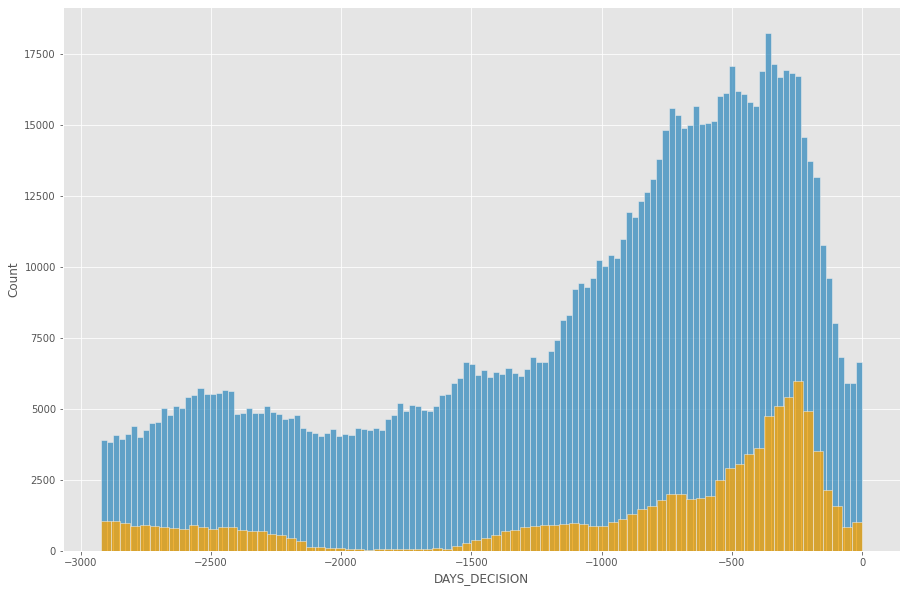

In [ ]:
sns.histplot(prev_apps[prev_apps.NAME_CONTRACT_STATUS == "Approved"].DAYS_DECISION)
sns.histplot(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].DAYS_DECISION, color = "orange")

In [ ]:
len(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].SK_ID_CURR.isin(app_train.SK_ID_CURR)) / len(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)])

1.0

In [ ]:
len(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].SK_ID_PREV.isin(pmts.SK_ID_PREV)) / len(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)])

1.0

In [ ]:
pmts[pmts.SK_ID_PREV.isin(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].SK_ID_PREV)]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.74
12,1570206,147645,0.0,20,-761.0,-761.0,21.510,21.51
14,1594684,100193,0.0,56,-1153.0,-1153.0,301.860,301.86
18,2391610,183431,0.0,20,-1680.0,-1693.0,7875.000,7875.00
40,2270983,159586,0.0,30,-2022.0,-2046.0,9000.000,1800.00
...,...,...,...,...,...,...,...,...
13605389,2186857,428057,0.0,69,-1532.0,NaN,67.500,NaN
13605393,1285736,434069,0.0,73,-853.0,NaN,67.500,NaN
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

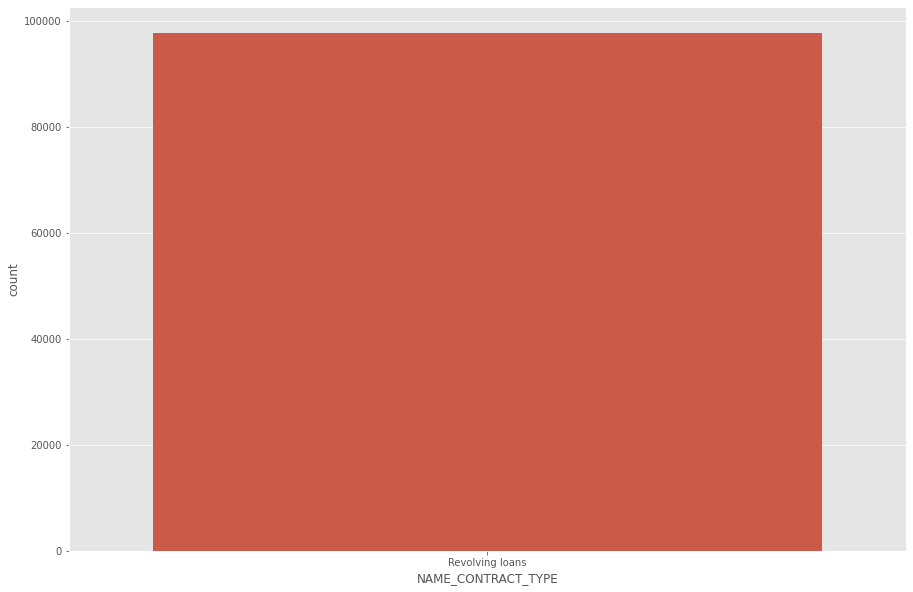

In [ ]:
sns.countplot(prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT == 0)].NAME_CONTRACT_TYPE)

It finally hit me. The people who do not have a predetermined amount of payments left on the previous credit application, ie CNT_PAYMENT = 0, and whose applications were approved applied for a REVOLVING LOAN. They can use their loan amount like a credit card, using it as they please so long as they make the payments. Also makes sense why their payment values fluctuate, but then this calls into question what the AMOUNT ANNUITY in the previous application column serves for then.  

# Has anyone not began making payments or not made any payments at all?

In [ ]:
# There are a few people who are not in the payments dataset but have previously approved loans, but the majority of them are. May be recent loans

print(pd.Series(pmts.SK_ID_PREV.unique()).isin(pd.Series(prev_apps.SK_ID_PREV.unique())).sum())
pd.Series(pmts.SK_ID_PREV.unique()).isin(pd.Series(prev_apps.SK_ID_PREV.unique())).sum() / len(pmts.SK_ID_PREV.unique())

958905


0.9610654751882232

Some people have either not made any payments at all of have not began repaying their loans. Or perhaps never used it, thus no payments were needed,


## People that have made payments on loans but we have no info on their previous loans

In [ ]:
missing_borrowers = pmts[~pmts.SK_ID_PREV.isin(prev_apps.SK_ID_PREV)].sort_values(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"])
print(len(missing_borrowers.SK_ID_PREV.unique()))
missing_borrowers.head()

38847


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
12093729,1000021,419785,1.0,3,-2908.0,-2908.0,11196.225,11196.225
11754454,1000021,419785,1.0,4,-2878.0,-2878.0,11196.225,11196.225
12836059,1000021,419785,1.0,5,-2848.0,-2848.0,11177.865,11177.865
4223187,1000037,284736,1.0,7,-2894.0,-2892.0,2228.895,2228.895
7016473,1000037,284736,1.0,8,-2864.0,-2863.0,2227.725,2227.725


In [ ]:

prev_apps[prev_apps.SK_ID_PREV == ID]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


<AxesSubplot:xlabel='DAYS_INSTALMENT', ylabel='Count'>

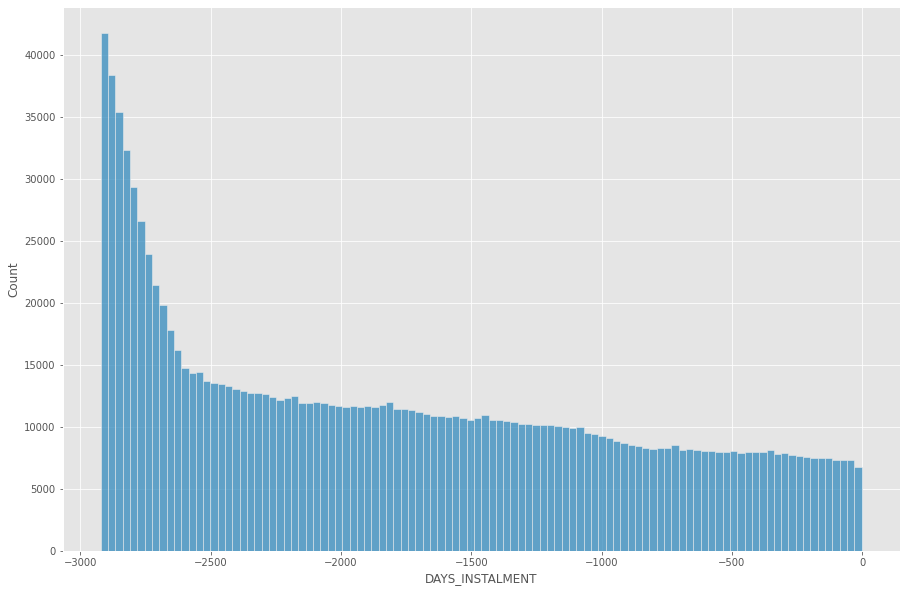

In [ ]:
# Obviously not only old loans. There are some payments that extend all the way into the current loans dataset.
sns.histplot(missing_borrowers.DAYS_INSTALMENT)

<AxesSubplot:xlabel='NUM_INSTALMENT_NUMBER', ylabel='Count'>

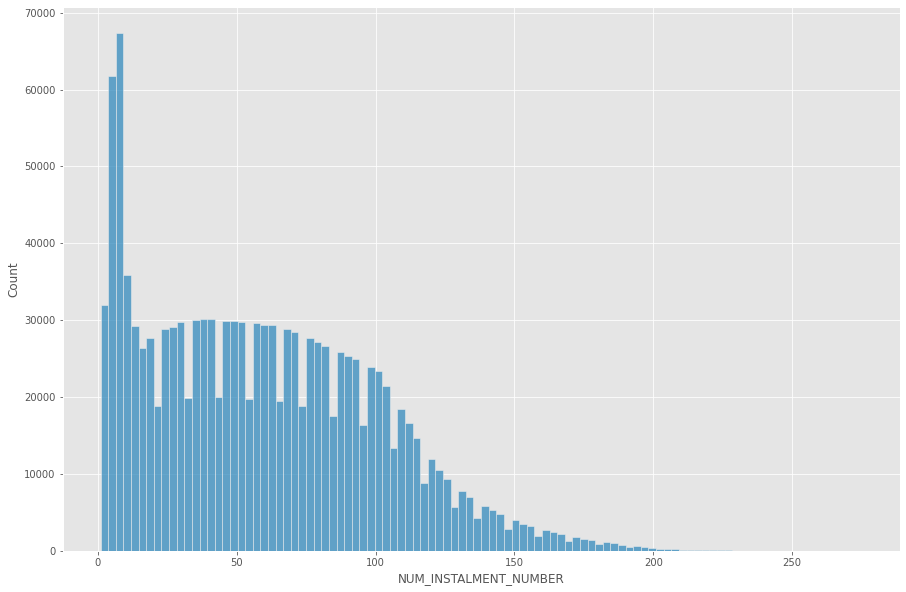

In [ ]:
sns.histplot(missing_borrowers.NUM_INSTALMENT_NUMBER, bins = 100)

<AxesSubplot:xlabel='NUM_INSTALMENT_NUMBER', ylabel='Count'>

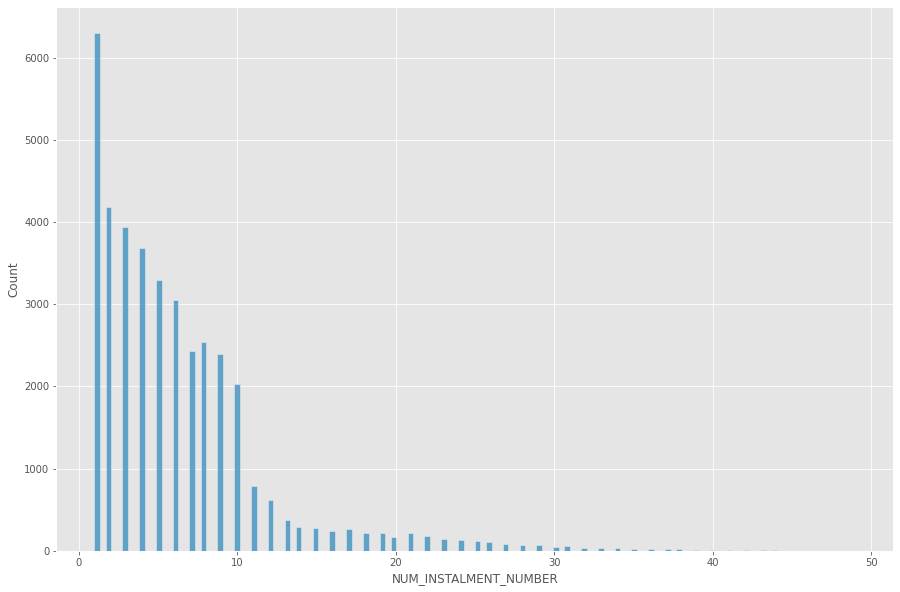

In [ ]:
# A lot of the missing borrowers first payment was the first isntallment of the loan. So why aren't they included in the data?
first_pmt = missing_borrowers.loc[missing_borrowers.groupby("SK_ID_PREV").NUM_INSTALMENT_NUMBER.idxmin()]
sns.histplot(first_pmt[first_pmt.NUM_INSTALMENT_NUMBER < 50].NUM_INSTALMENT_NUMBER)

<AxesSubplot:xlabel='DAYS_INSTALMENT', ylabel='Count'>

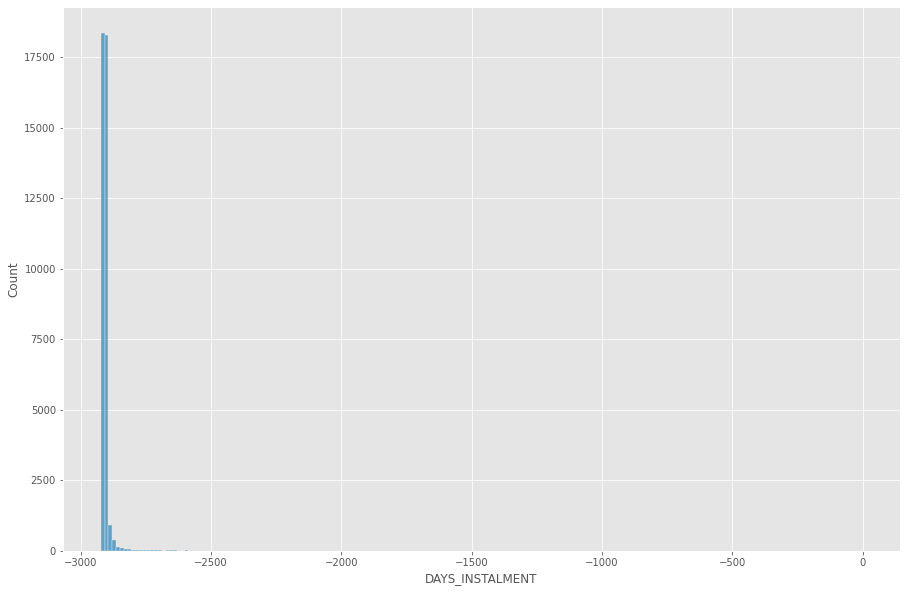

In [ ]:
sns.histplot(first_pmt.DAYS_INSTALMENT, bins = 200)

In [ ]:
missing_borrowers.SK_ID_CURR.isin(app_train.SK_ID_CURR).sum() / len(missing_borrowers)

0.8149582755715024

### Findings
- Some of the loans do extend up until the current loan. They are not strictly old loans, so there is no reason they should not be included in the previous loan dataset. Perhaps they fell through the cracks and were accidently not inculuded.
- Some of the payments are missing. There are some whose payemnts records from the beginning are not included.
    - some of the loan payments begin on the 3rd installment, for example. 
- Although some of the payments do extend to the current applications date, the first payments made on the loans were long ago, about 10 years ago in fact.
    - they may be old loans that are only now being completed. Starting to make sense why they were not included. Perhaps didnt have the records.
- About 80% of the people in the loans did apply and have a current loan, ie, included in the current loan dataset.

## Number of people with previous loans

In [ ]:
ids = list(prev_apps.SK_ID_CURR.unique()) + list(missing_borrowers.SK_ID_CURR.unique())


In [ ]:
app_train.SK_ID_CURR.isin(ids).sum() / len(app_train.SK_ID_CURR.unique())

0.9514098682648751

### Findings

95% of all people in the current applications dataset have some type of previous loan, leaving the remaining ~5% of people must be new borrowers.

## Who are the people with approved loans but no payments made?

In [ ]:
no_pmts = prev_apps[~prev_apps.SK_ID_PREV.isin(pmts.SK_ID_PREV)]
print(len(no_pmts.SK_ID_PREV.unique()))
no_pmts.head()

711309


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

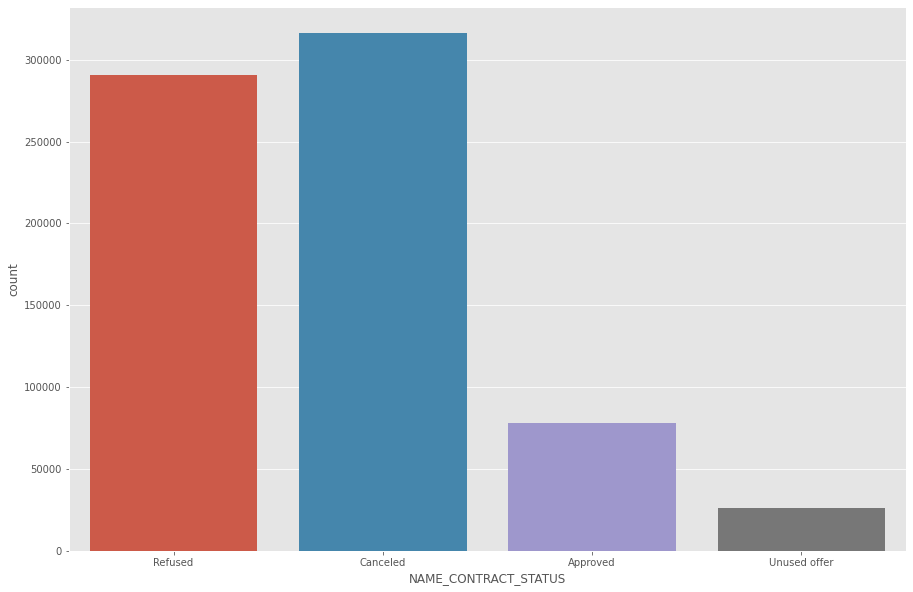

In [ ]:
# As expected, the majority of the borrowers not included in the installments dataset were refused a loan or cancelled their application.
# There is a non-significant amount of people who are not included but were approved for a loan. Perhaps they were recently approved 
    # and have no yet made any payments.
sns.countplot(no_pmts.NAME_CONTRACT_STATUS)

In [ ]:
no_pmts_approved = no_pmts[no_pmts.NAME_CONTRACT_STATUS == "Approved"]
print(len(no_pmts_approved.SK_ID_PREV.unique()))
no_pmts_approved

77876


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
18,2393109,396305,Cash loans,10181.700,180000.0,180000.0,NaN,180000.0,THURSDAY,14,...,XNA,24.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
47,1475738,235737,Cash loans,75897.630,2025000.0,2241513.0,NaN,2025000.0,THURSDAY,19,...,XNA,54.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
49,1371540,200721,Revolving loans,11250.000,225000.0,225000.0,NaN,225000.0,FRIDAY,15,...,XNA,0.0,XNA,Card Street,365243.0,365243.0,365243.0,365243.0,-171.0,0.0
74,1385097,369423,Consumer loans,2652.705,19611.0,14170.5,6111.0,19611.0,FRIDAY,12,...,Consumer electronics,6.0,middle,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
138,1897668,205582,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,MONDAY,16,...,Consumer electronics,0.0,XNA,Card Street,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670150,1556936,169693,Cash loans,18852.435,90000.0,92970.0,NaN,90000.0,THURSDAY,12,...,XNA,6.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN
1670159,2354512,393355,Cash loans,20380.500,450000.0,450000.0,NaN,450000.0,WEDNESDAY,18,...,XNA,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
1670175,1176409,247954,Cash loans,9740.250,135000.0,135000.0,NaN,135000.0,THURSDAY,16,...,XNA,18.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
1670177,2486989,391517,Cash loans,20876.805,270000.0,299223.0,NaN,270000.0,SUNDAY,11,...,XNA,24.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


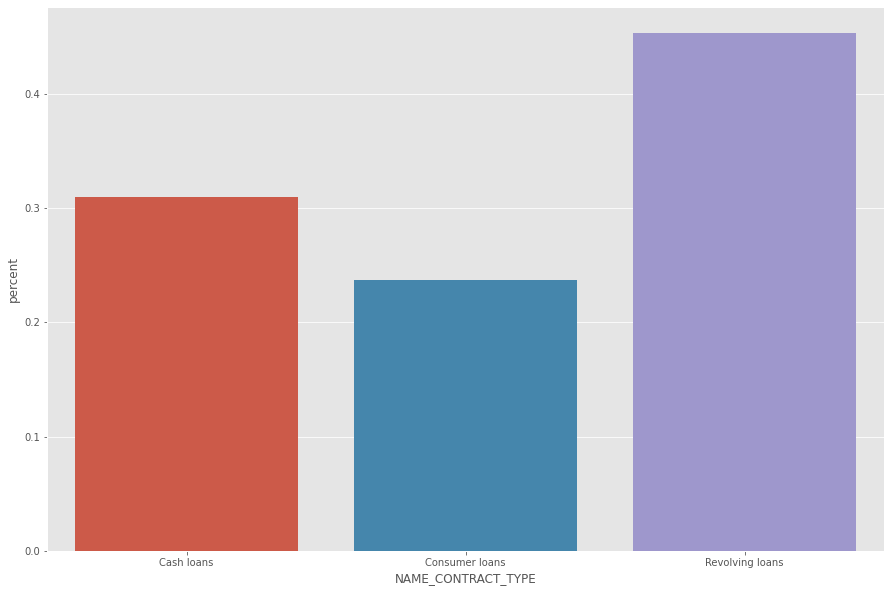

In [ ]:
perc_no_pmts = no_pmts_approved.groupby("NAME_CONTRACT_TYPE").NAME_CONTRACT_TYPE.agg(total = "count").reset_index()
perc_no_pmts["percent"] = perc_no_pmts.total / len(no_pmts_approved)
perc_no_pmts

sns.barplot(x = perc_no_pmts.NAME_CONTRACT_TYPE, y = perc_no_pmts.percent)
plt.show()

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='Count'>

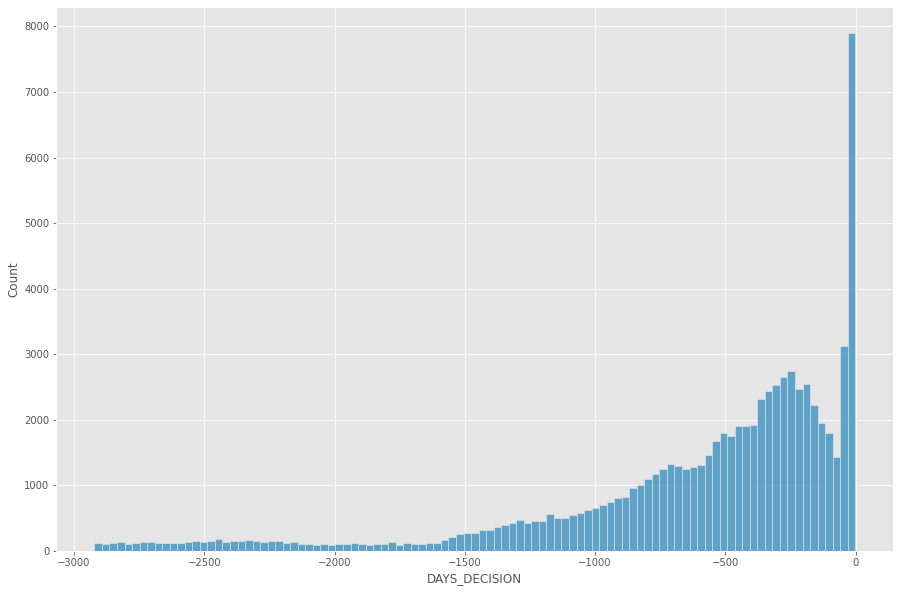

In [ ]:
sns.histplot(no_pmts_approved.DAYS_DECISION)

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='Density'>

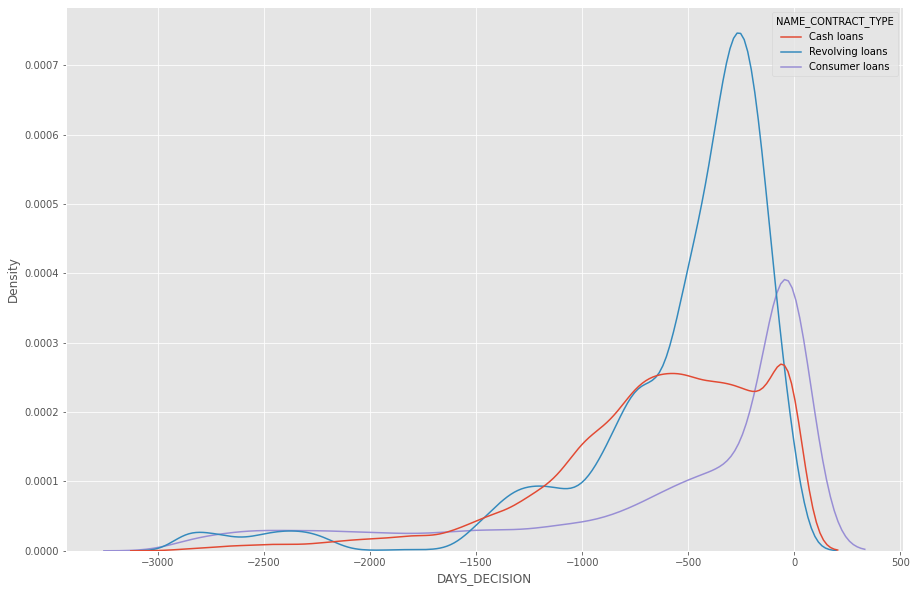

In [ ]:
sns.kdeplot(no_pmts_approved.DAYS_DECISION, hue = no_pmts_approved.NAME_CONTRACT_TYPE)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DAYS_DECISION', ylabel='NAME_CONTRACT_TYPE'>

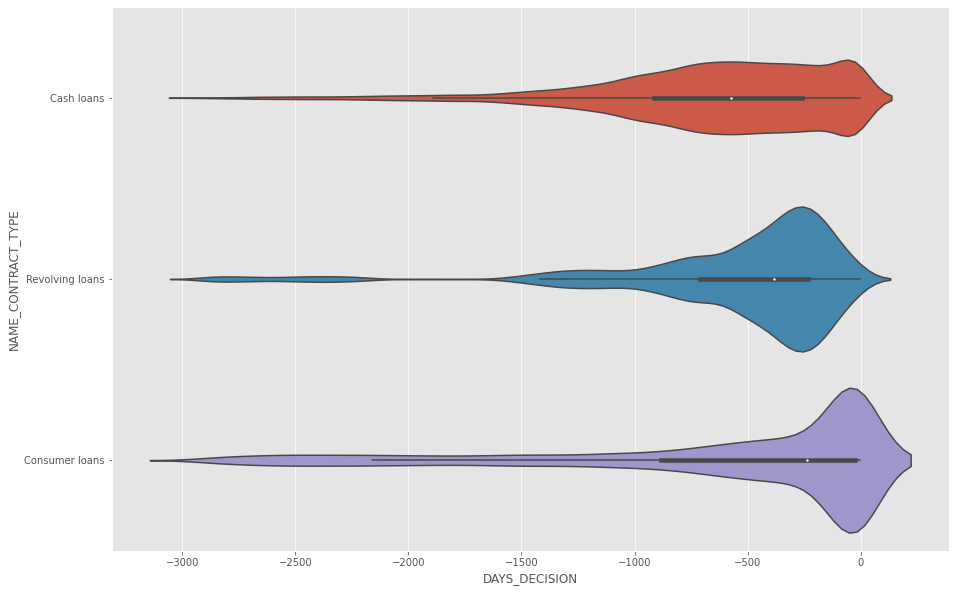

In [ ]:
sns.violinplot(no_pmts_approved.DAYS_DECISION, y = no_pmts_approved.NAME_CONTRACT_TYPE)

### Findings:
- There is a sizeable portion of people who were approved for a previous loan but are not included in the installment payments dataset for some reason. 
- Out of those approved people, about half of the were approved for revolving loans, hinting to them probably never used their credit line. 
    - As for the others, that remains a mystery. They are normal cash and consumer loans, so they have to be repaid. I highly doubt someone would take out a loan and hand it right back, which is the only way I see there would be no records of any payments required or made. 
    - Unless of course they are recent loans
- A large portion of them are very recently decided on. 

# Who hasn't finished paying their loans? Who has an open balance?

In [5]:
open_loans = prev_apps[(prev_apps.NAME_CONTRACT_STATUS == "Approved") & (prev_apps.CNT_PAYMENT > 0)]
open_pmts = pmts[pmts.SK_ID_PREV.isin(open_loans.SK_ID_PREV)]

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

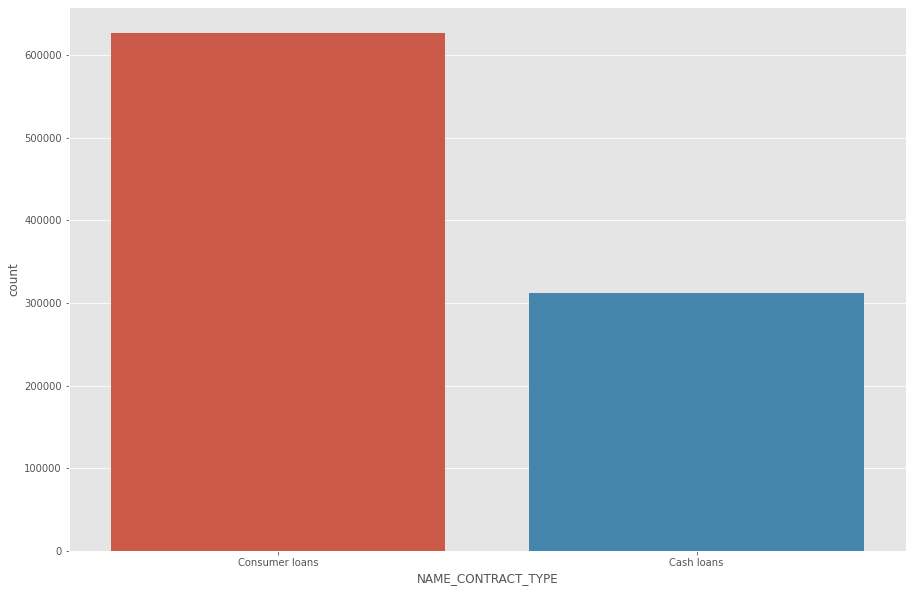

In [ ]:
sns.countplot(open_loans.NAME_CONTRACT_TYPE)

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='Count'>

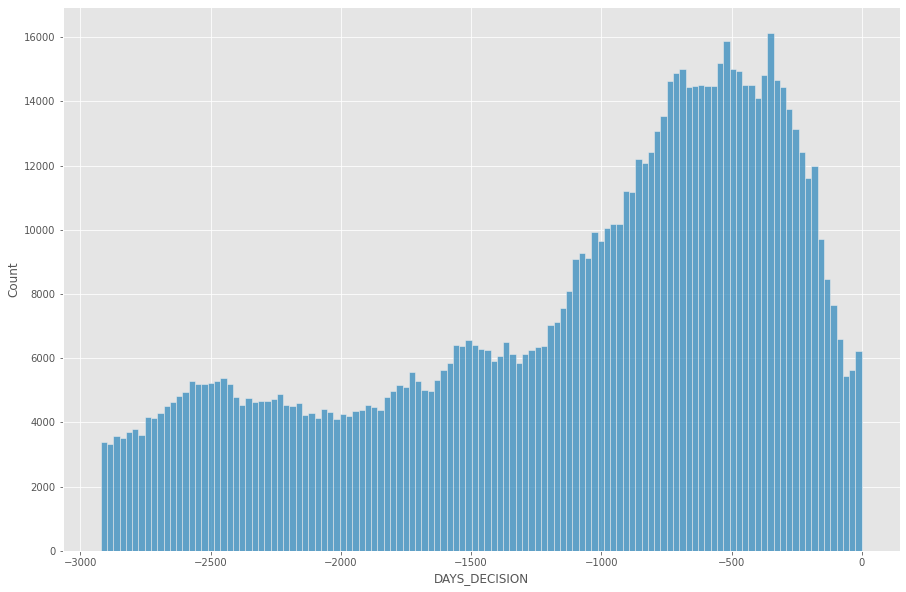

In [ ]:
sns.histplot(open_loans.DAYS_DECISION)

In [13]:
open_pmts_made = open_pmts.groupby("SK_ID_PREV").NUM_INSTALMENT_NUMBER.unique().agg(payments = "count").reset_index()
open_pmts_made = open_pmts_made.merge(open_loans[["SK_ID_PREV", "CNT_PAYMENT"]])
open_pmts_made["still_open"] = open_pmts_made.payments < open_pmts_made.CNT_PAYMENT
open_pmts_made

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [10]:
open_pmts[open_pmts.SK_ID_PREV == 1000005].sort_values("NUM_INSTALMENT_NUMBER")

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1310691,1000005,176456,1.0,1,-1688.0,-1687.0,14713.605,14713.605
109820,1000005,176456,1.0,2,-1658.0,-1664.0,14713.605,14713.605
2255181,1000005,176456,1.0,3,-1628.0,-1636.0,14713.605,14713.605
2170925,1000005,176456,1.0,4,-1598.0,-1606.0,14713.605,14713.605
2612194,1000005,176456,1.0,5,-1568.0,-1575.0,14713.605,14713.605
3503786,1000005,176456,1.0,6,-1538.0,-1545.0,14713.605,14713.605
2892901,1000005,176456,1.0,7,-1508.0,-1512.0,14713.605,14713.605
632811,1000005,176456,1.0,8,-1478.0,-1484.0,14713.605,14713.605
1740975,1000005,176456,1.0,9,-1448.0,-1445.0,14713.605,14710.815
2618814,1000005,176456,1.0,9,-1448.0,-1484.0,14713.605,2.790


In [12]:
14710.815 + 2.79

14713.605000000001

In [ ]:
n 

### Findings
- Have to go back and fix an issue. Tried to compare the number of payments made in the installment payments dataset to the number of payments perspecified on the loan agreement
    - Mistakenly counted the number of lines in the installments dataset per each loan thinking it would give me the number of payments made so far. 
    - Did not take into account that multiple payments could be made towards the same installment due to mistakes made when making the initial payment to giving a portion of it at different points in time.


# How many late payments?

# Ongoing Notes:
- Attempt to find if they have an ongoing previous loan
    - can do so by comparing the number of payments (if given) in the previous application dataset to the number of payments made so far in the installments payments dataframe.
    - can use as an indicator for model if they have an ongoing previous loan. 

- Look into if there are any people who were approved for a previous loan with 0 for the CNT_PAYEMTN variable but have made payments
    - found reason, they have revolving loans instead of cash/consumer loans
    
- Find out who have missed loans.
    - can use as indicator for model on current application data

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9263f292-ea73-48e7-8892-f3d3ed1db03c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>